# 0-Notes

In [1]:
# Notes:
# +0. StandardScaler isdeat of MinMaxScaler()
# -1. Add Recall, Precision, Specificity to model_check()
# -2. drop zeros:near zero variance sklearn
# perfomance check for every model
# +3. pca with normalization
# 4. accuracy for customers that didn pay, but loss is less than 10%
# 5. accuracy for customers that didn pay, but loss is more than 90%
# 6. Roc curve?
# 7. Compare models together



# 1-Data preparation

## 1-1-Import data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('loan-default-iter2.csv', index_col='id')
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f93,f94,f95,f96,f97,f98,f99,f100,loss
id,,,,,,,,,,,,,,,,,,,,,
1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,...,0.15,0.01,0.12,851.0,851.0,851.0,851.0,0.32,1.34,0
2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,...,0.29,0.09,0.08,20.0,20.0,20.0,20.0,0.28,1.43,0
3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,...,0.01,0.00,0.07,124.0,124.0,124.0,124.0,0.25,1.52,0
4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,...,0.01,0.00,0.12,903.0,903.0,903.0,903.0,0.32,1.35,0
5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,...,0.51,0.90,0.06,5.0,5.0,5.0,5.0,0.23,1.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79996,117,8,0.071314,1300,4,76831,4614.0,3102.0,120.50,117.52,...,0.26,0.09,0.09,422.0,422.0,422.0,422.0,0.29,1.41,0
79997,125,8,0.793560,1300,4,83549,1205.0,2950.0,124.11,124.77,...,0.03,0.00,0.10,117.0,117.0,117.0,117.0,0.30,1.37,0
79998,120,8,0.081656,1300,4,2572,6943.0,3734.0,122.16,120.45,...,0.08,0.00,0.10,671.0,671.0,671.0,671.0,0.30,1.37,0


## 1-2-create category paid/not paid

In [4]:
# function : paid/not paid based on loss
def convert_to_categorical(col): 
    if col == 0: 
        return 'paid' 
    else: 
        return 'not paid'
data['target'] = data['loss'].apply(convert_to_categorical)

In [5]:
import numpy as np
data['target'] = data['loss'].apply(convert_to_categorical)
data.target.value_counts()
# too many paid! not good for training the model!

paid        72703
not paid     7297
Name: target, dtype: int64

## 1-3-Drop columns with all zeros

In [6]:
# check columns with all zeros
is_filled_with_0 ={}
for column in data.columns[0:-2]:
    is_filled_with_0.update({column:data[data[column]==0].shape[0] == len(data)})
is_filled_with_0

{'f1': False,
 'f2': False,
 'f3': False,
 'f4': False,
 'f5': False,
 'f6': False,
 'f7': False,
 'f8': False,
 'f9': False,
 'f10': False,
 'f13': False,
 'f14': False,
 'f15': False,
 'f16': False,
 'f17': False,
 'f18': False,
 'f19': False,
 'f20': False,
 'f21': False,
 'f22': False,
 'f23': False,
 'f24': False,
 'f25': False,
 'f26': False,
 'f27': False,
 'f28': False,
 'f29': False,
 'f30': False,
 'f31': False,
 'f32': False,
 'f33': True,
 'f34': True,
 'f35': True,
 'f36': False,
 'f37': True,
 'f38': True,
 'f39': False,
 'f40': False,
 'f41': False,
 'f42': False,
 'f43': False,
 'f44': False,
 'f45': False,
 'f46': False,
 'f47': False,
 'f48': False,
 'f49': False,
 'f50': False,
 'f51': False,
 'f52': False,
 'f53': False,
 'f54': False,
 'f55': False,
 'f56': False,
 'f57': False,
 'f58': False,
 'f59': False,
 'f60': False,
 'f61': False,
 'f62': False,
 'f63': False,
 'f64': False,
 'f65': False,
 'f66': False,
 'f67': False,
 'f68': False,
 'f69': False,
 'f70': F

In [7]:
summ = 0
for key in is_filled_with_0.keys():
    if is_filled_with_0[key] == True:
        summ +=1
summ

5

In [8]:
# drop columns with all zeros
for key in is_filled_with_0.keys():
    if is_filled_with_0[key] == True:
        data.drop(key,axis=1,inplace=True)

## 1-?-Check columns with low variance

In [9]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
data_temp = data.iloc[:,0:-2].copy()
data_temp.shape[1]

93

In [11]:
sel = VarianceThreshold()
# Features with a training-set variance LOWER than this threshold will be removed. The default is to keep all
# features with non-zero variance, i.e. remove the features that have the same value in all samples.

In [12]:
sel.fit(data_temp)

VarianceThreshold()

In [13]:
variances = pd.DataFrame({'feauture':data_temp.columns, 'variance':sel.variances_})
variances.sort_values(by='variance',ascending=True, inplace=True)


In [14]:
threshold = 0.8 * (1 - 0.8)
# means: constant in at least 80% of the instances
variances_ = variances.query('variance < 0.01')
variances_

,feauture,variance
86,f94,0.000901
76,f84,0.001527
91,f99,0.002444
61,f69,0.002649
62,f70,0.003386
81,f89,0.003504
92,f100,0.009268


In [15]:
#data_temp[variances_.feauture].head(20)

In [16]:
print('Columns to drop:',len(variances_))

Columns to drop: 7


In [17]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(data_temp)
print('Total columns:', len(sel.get_support()))
print('Columns to drop:',list(sel.get_support()).count(False))


Total columns: 93
Columns to drop: 7


## 1-4-Drop columns with too many zeros(>70%)

In [18]:
# check null values, % in each column
null_values = (data.iloc[:,0:-2] == 0).sum(axis=0)/data.shape[0]*100
null_values.sort_values(ascending=False).head(30)

f83    73.85000
f93    73.64875
f70    11.07000
f69    10.23250
f30    10.03625
f29    10.03625
f27    10.03625
f24    10.03625
f28    10.03625
f18    10.00750
f15     9.98125
f14     9.92500
f17     9.88500
f20     9.57625
f25     8.79875
f22     8.67625
f21     8.47500
f32     4.96750
f72     2.60500
f40     2.09875
f50     1.91125
f89     1.49625
f87     1.49250
f84     1.49250
f85     1.49250
f86     1.49250
f88     1.49250
f99     1.39250
f94     1.38250
f97     1.38250
dtype: float64

In [19]:
# drop columns f83, f93 - too many zeros
data.drop(['f83','f93'],axis=1,inplace=True)

## 1-5-Drop duplicates

In [20]:
data.drop_duplicates()
# no duplicates!

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f94,f95,f96,f97,f98,f99,f100,loss,target
id,,,,,,,,,,,,,,,,,,,,,
1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,...,0.15,0.12,851.0,851.0,851.0,851.0,0.32,1.34,0,paid
2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,...,0.29,0.08,20.0,20.0,20.0,20.0,0.28,1.43,0,paid
3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,...,0.01,0.07,124.0,124.0,124.0,124.0,0.25,1.52,0,paid
4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,...,0.01,0.12,903.0,903.0,903.0,903.0,0.32,1.35,0,paid
5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,...,0.51,0.06,5.0,5.0,5.0,5.0,0.23,1.56,0,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79996,117,8,0.071314,1300,4,76831,4614.0,3102.0,120.50,117.52,...,0.26,0.09,422.0,422.0,422.0,422.0,0.29,1.41,0,paid
79997,125,8,0.793560,1300,4,83549,1205.0,2950.0,124.11,124.77,...,0.03,0.10,117.0,117.0,117.0,117.0,0.30,1.37,0,paid
79998,120,8,0.081656,1300,4,2572,6943.0,3734.0,122.16,120.45,...,0.08,0.10,671.0,671.0,671.0,671.0,0.30,1.37,0,paid


## 1-6-Check correlation

In [21]:
data_temp = data.copy()
data_temp['target_num'] = np.where(data['loss']>0, 1, 0)

In [22]:
correlation_matrix = data_temp.corr()
correlation_matrix

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f94,f95,f96,f97,f98,f99,f100,loss,target_num
f1,1.000000,-0.247156,-0.001845,0.794563,-0.330602,0.112862,-0.184160,-0.164189,0.974111,0.998744,...,0.010417,0.159813,-0.077806,-0.077806,-0.077806,-0.077806,0.105825,-0.160487,-0.006955,0.015164
f2,-0.247156,1.000000,0.000711,-0.252259,0.252693,0.084261,-0.109939,-0.149066,-0.286518,-0.255698,...,-0.016335,-0.228392,-0.173856,-0.173856,-0.173856,-0.173856,-0.210094,0.218223,-0.000676,-0.000445
f3,-0.001845,0.000711,1.000000,-0.001167,0.004881,0.001179,0.003829,-0.003993,-0.002101,-0.001946,...,0.000930,0.004331,0.004779,0.004779,0.004779,0.004779,0.004878,-0.004920,0.001611,0.004514
f4,0.794563,-0.252259,-0.001167,1.000000,-0.316336,0.130428,-0.252565,-0.199759,0.840515,0.805701,...,-0.003531,0.095729,-0.153029,-0.153029,-0.153029,-0.153029,0.045995,-0.087330,-0.004084,-0.004004
f5,-0.330602,0.252693,0.004881,-0.316336,1.000000,-0.057789,0.141042,0.015580,-0.347349,-0.334903,...,0.014671,-0.063476,0.082252,0.082252,0.082252,0.082252,-0.037612,0.058116,0.003553,0.015091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f98,-0.077806,-0.173856,0.004779,-0.153029,0.082252,-0.251359,0.951921,0.239673,-0.099195,-0.081788,...,0.098335,0.506656,1.000000,1.000000,1.000000,1.000000,0.469931,-0.502243,-0.002276,0.061381
f99,0.105825,-0.210094,0.004878,0.045995,-0.037612,-0.100724,0.370209,0.154811,0.100702,0.105428,...,0.154779,0.854244,0.469931,0.469931,0.469931,0.469931,1.000000,-0.985950,-0.001967,0.058946
f100,-0.160487,0.218223,-0.004920,-0.087330,0.058116,0.120202,-0.362391,-0.151266,-0.150852,-0.159522,...,-0.144674,-0.953477,-0.502243,-0.502243,-0.502243,-0.502243,-0.985950,1.000000,0.001818,-0.064509
loss,-0.006955,-0.000676,0.001611,-0.004084,0.003553,-0.003529,-0.000857,-0.003905,-0.005198,-0.006536,...,-0.002047,-0.001414,-0.002276,-0.002276,-0.002276,-0.002276,-0.001967,0.001818,1.000000,0.574480


In [23]:
# check correlation between param and target
correlation_matrix['target_num'].sort_values(ascending=False).head(30)

target_num    1.000000
loss          0.574480
f25           0.100145
f31           0.098009
f26           0.097614
f55           0.078683
f56           0.077952
f63           0.077328
f19           0.075730
f84           0.071579
f65           0.070136
f64           0.068551
f32           0.067455
f89           0.067149
f45           0.066428
f85           0.066031
f87           0.066031
f88           0.066031
f86           0.066031
f59           0.065847
f94           0.064612
f28           0.061768
f49           0.061412
f97           0.061381
f98           0.061381
f96           0.061381
f95           0.061381
f30           0.060806
f24           0.060393
f60           0.060099
Name: target_num, dtype: float64

In [24]:
# many features have correlation > 0.9!
list_corr = []
for row in correlation_matrix.index:
    for col in list(correlation_matrix.columns):
        if abs(correlation_matrix.loc[row,col]) > 0.9 and row != col:
            list_corr.append([row,col,correlation_matrix.loc[row,col]])
list_corr 

[['f1', 'f9', 0.9741109813268337],
 ['f1', 'f10', 0.9987444992933321],
 ['f7', 'f78', 0.9881538847206764],
 ['f7', 'f79', 0.9754388074186067],
 ['f7', 'f95', 0.9519208112922621],
 ['f7', 'f96', 0.9519208112922621],
 ['f7', 'f97', 0.9519208112922621],
 ['f7', 'f98', 0.9519208112922621],
 ['f9', 'f1', 0.9741109813268337],
 ['f9', 'f10', 0.9834956121795879],
 ['f10', 'f1', 0.9987444992933321],
 ['f10', 'f9', 0.9834956121795879],
 ['f13', 'f68', 0.9421821915281068],
 ['f14', 'f15', 0.9798737119953536],
 ['f14', 'f17', 0.9855264795066454],
 ['f14', 'f18', 0.9299801297829013],
 ['f14', 'f20', 0.9626250063243184],
 ['f14', 'f21', 0.9775498392137574],
 ['f14', 'f22', 0.9823625744570326],
 ['f14', 'f24', 0.9828618181906823],
 ['f14', 'f28', 0.9413514319980961],
 ['f14', 'f30', 0.9484772262176516],
 ['f14', 'f40', 0.9235351836172128],
 ['f14', 'f46', 0.9549740512242658],
 ['f14', 'f50', 0.9748100413969607],
 ['f14', 'f60', 0.9613276847420534],
 ['f15', 'f14', 0.9798737119953536],
 ['f15', 'f17',

## 1-7-Balance initial data set

In [25]:
data.target.value_counts()

paid        72703
not paid     7297
Name: target, dtype: int64

In [26]:
# how many not paid ?
data_not_paid = data[data['target'] == 'not paid']
lenth_not_paid = len(data_not_paid)

In [27]:
# take the same number like not paid in paid
data_paid = data[data['target'] == 'paid'].iloc[0:lenth_not_paid,:]

In [28]:
# connect paid/not paid and shuffle
data_50_50 = pd.concat([data_paid, data_not_paid], ignore_index=True)
data_50_50 = data_50_50.sample(frac=1).reset_index(drop=True)

## 1-8-Split data

In [29]:
# split balanced data 
from sklearn.model_selection import train_test_split

X_col = data.columns[0:-2]
y_col = 'target'

X = data_50_50[X_col]
y = data_50_50[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
### 1-?-Replace NaN with mean values

In [31]:
# replace missing values with mean (from X_train) values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

X_train_transf = imputer.transform(X_train)
X_test_transf = imputer.transform(X_test)

# make dataframe (after splitting it is not a dataframe)
X_train = pd.DataFrame(X_train_transf, 
                                 columns=X_train.columns,
                                 index=X_train.index)
X_test = pd.DataFrame(X_test_transf, 
                                 columns=X_test.columns,
                                 index=X_test.index)

## 1-9-Normalize data

In [32]:
# min an max scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
# StandardScaler scales to unit variance
# scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = pd.DataFrame(scaler.transform(X_train))
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(scaler.transform(X_test))
X_test_sc.columns = X_test.columns

## 1-10-Additonal test datasets 

### 1-10-1-Not normalized

In [33]:
# data_not_paid = data[data['target'] == 'not paid'].copy()
# X_not_paid =data_not_paid[0:-2]
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(X_not_paid)
# X_train_transf = imputer.transform(X_train)

In [34]:
# not paid but less than 10% loss
data_less_10 = data.copy()
data_less_10.query('target == "not paid" & loss < 10',inplace=True)
# separate features and target
X_less_10 =data_less_10.iloc[:,0:-2]
y_less_10 = data_less_10['target']
# replace missing values with mean
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_less_10)
X_less_10_transf = imputer.transform(X_less_10)
# make dataframe
X_less_10 = pd.DataFrame(X_less_10_transf, 
                            columns=X_less_10.columns,
                            index=X_less_10.index)

In [35]:
# # not paid and more than 90% loss
data_more_90 = data.copy()
data_more_90.query('target == "not paid" & loss > 90', inplace = True)
# separate features and target
X_more_90 =data_more_90.iloc[:,0:-2]
y_more_90 = data_more_90['target']
# replace missing values with mean
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_more_90)
X_more_90_transf = imputer.transform(X_more_90)
# make dataframe
X_more_90 = pd.DataFrame(X_more_90_transf, 
                            columns=X_more_90.columns,
                            index=X_more_90.index)

### 1-10-2-Normalized

In [36]:
# create SCALED datasets
scaler = MinMaxScaler(feature_range=(0,1))
# StandardScaler scales to unit variance
# scaler = StandardScaler()
scaler.fit(X_less_10)
X_less_10_sc = pd.DataFrame(scaler.transform(X_less_10))
X_less_10_sc.columns = X_less_10.columns

scaler.fit(X_more_90)
X_more_90_sc = pd.DataFrame(scaler.transform(X_more_90))
X_more_90_sc.columns = X_more_90.columns



# 2-Applying models

## 2-0-Function: model_check()

In [37]:
# create a function to check the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def model_check(y_true, y_pred, model): 
    acc_sc = accuracy_score(y_true, y_pred)
    #recall_sc= recall_score(y_true, y_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(y_true, y_pred))
    conf_matrix.set_index(model.classes_, inplace=True)
    conf_matrix.columns = model.classes_
    return conf_matrix, acc_sc

## 2-1-Decision tree

### 2-1-1-Modell

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [39]:
# train
con_matr, acc_scor = model_check(y_train, tree.predict(X_train), tree)
accuracy_model = pd.DataFrame({'model':'Decision Tree','scaled':False,'dataset':'balanced','type': 'train','accuracy':[acc_scor]})

In [40]:
# test
con_matr, acc_scor = model_check(y_test, tree.predict(X_test), tree)
accuracy_model = accuracy_model.append({'model':'Decision Tree','scaled':False,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-1-2-Modell with normalization

In [41]:
# train
tree.fit(X_train_sc, y_train)
con_matr, acc_scor = model_check(y_train, tree.predict(X_train_sc), tree)
accuracy_model = accuracy_model.append({'model':'Decision Tree','scaled':True,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [42]:
# test
con_matr, acc_scor = model_check(y_test, tree.predict(X_test_sc), tree)
accuracy_model = accuracy_model.append({'model':'Decision Tree','scaled':True,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-1-3-Accuracy/depth

In [43]:
# trying different depths
accuracy_depth_test = {}
accuracy_depth_train = {}
for i in range(2,16):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train_sc, y_train)
    conf_matrix_tr, acc_sc_tr = model_check(y_train, tree.predict(X_train_sc), tree)
    conf_matrix_test, acc_sc_test = model_check(y_test, tree.predict(X_test_sc), tree)
    accuracy_depth_test[i] = acc_sc_test
    accuracy_depth_train[i] = acc_sc_tr

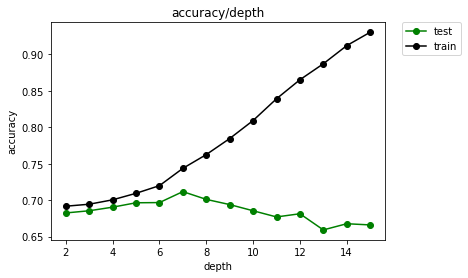

In [44]:
import matplotlib.pyplot as plt
x = accuracy_depth_test.keys()
y1 = accuracy_depth_test.values()
y2 = accuracy_depth_train.values()
plt.title("accuracy/depth")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [45]:
accuracy_depth_test

{2: 0.6823787338996985,
 3: 0.6853932584269663,
 4: 0.6903261167443135,
 5: 0.696355165798849,
 6: 0.6966292134831461,
 7: 0.7117018361194848,
 8: 0.7010139764318991,
 9: 0.6938887366401754,
 10: 0.6853932584269663,
 11: 0.6768977802137572,
 12: 0.6812825431625102,
 13: 0.6590846807344478,
 14: 0.6675801589476569,
 15: 0.6659358728418745}

### 2-1-4-Application on additional data sets

In [46]:
# not paid and loss more than 90
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train_sc, y_train)
con_matr, acc_scor = model_check(y_more_90, tree.predict(X_more_90_sc), tree)
accuracy_model = accuracy_model.append({'model':'Decision Tree','scaled':True,'dataset':'more_90','type': 'test','accuracy':acc_scor},ignore_index=True)

In [47]:
# not paid and loss less than 10
con_matr, acc_scor = model_check(y_less_10, tree.predict(X_less_10_sc), tree)
accuracy_model = accuracy_model.append({'model':'Decision Tree','scaled':True,'dataset':'less_10','type': 'test','accuracy':acc_scor},ignore_index=True)

In [48]:
accuracy_model

,model,scaled,dataset,type,accuracy
0,Decision Tree,False,balanced,train,0.709365
1,Decision Tree,False,balanced,test,0.696355
2,Decision Tree,True,balanced,train,0.709365
3,Decision Tree,True,balanced,test,0.696355
4,Decision Tree,True,more_90,test,0.600000
5,Decision Tree,True,less_10,test,0.468233


## 2-2-KNN - K Nearest Neighbors

### 2-2-1-Modell

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [50]:
# train 
con_matr,acc_scor = model_check(y_train, knn.predict(X_train), knn)
accuracy_model = accuracy_model.append({'model':'KNN','scaled':False,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [51]:
# test
con_matr,acc_scor = model_check(y_test, knn.predict(X_test), knn)
accuracy_model = accuracy_model.append({'model':'KNN','scaled':False,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-2-2-Modell with normalization+

In [52]:
# train
knn.fit(X_train_sc, y_train)
con_matr,acc_scor = model_check(y_train, knn.predict(X_train_sc), knn)
accuracy_model = accuracy_model.append({'model':'KNN','scaled':True,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [53]:
# test
con_matr,acc_scor = model_check(y_test, knn.predict(X_test_sc), knn)
accuracy_model = accuracy_model.append({'model':'KNN','scaled':True,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-2-3-Accuracy/number of neighbors

In [54]:
# trying different number of neighbors
# trying different depths
accuracy_neighbor_test = {}
accuracy_neighbor_train = {}
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sc, y_train)
    conf_matrix_tr, acc_sc_tr = model_check(y_train, knn.predict(X_train_sc), knn)
    conf_matrix_test, acc_sc_test = model_check(y_test, knn.predict(X_test_sc), knn)
    accuracy_neighbor_test[i] = acc_sc_test
    accuracy_neighbor_train[i] = acc_sc_tr

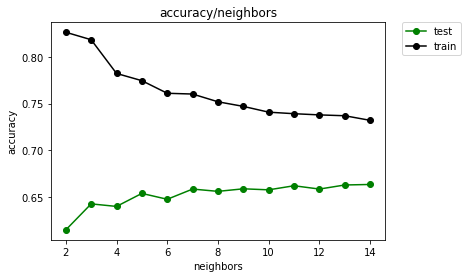

In [55]:
import matplotlib.pyplot as plt
x = accuracy_neighbor_test.keys()
y1 = accuracy_neighbor_test.values()
y2 = accuracy_neighbor_train.values()

plt.title("accuracy/neighbors")
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [56]:
accuracy_neighbor_test

{2: 0.6144149081940258,
 3: 0.6423677719923266,
 4: 0.639627295149356,
 5: 0.6536037270485064,
 6: 0.6473006303096739,
 7: 0.6582625376815566,
 8: 0.655796108522883,
 9: 0.6585365853658537,
 10: 0.6574403946286654,
 11: 0.6618251575774184,
 12: 0.6582625376815566,
 13: 0.6626473006303096,
 14: 0.6631953959989038}

### 2-2-4-Application on additional data sets

In [57]:
# not paid and loss more than 90
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)
con_matr, acc_scor = model_check(y_more_90, knn.predict(X_more_90_sc), knn)
accuracy_model = accuracy_model.append({'model':'KNN','scaled':True,'dataset':'more_90','type': 'test','accuracy':acc_scor},ignore_index=True)

In [58]:
# not paid and loss less than 10
con_matr, acc_scor = model_check(y_less_10, knn.predict(X_less_10_sc), knn)
accuracy_model = accuracy_model.append({'model':'KNN','scaled':True,'dataset':'less_10','type': 'test','accuracy':acc_scor},ignore_index=True)

## 2-3-Logistic regression

### 2-3-1-Modell

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lg = LogisticRegression(max_iter=1000)
# Error while inserting scaled data
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
# train
conf_matr, acc_scor = model_check(y_train, lg.predict(X_train), lg)
accuracy_model = accuracy_model.append({'model':'Logistic regression','scaled':False,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [62]:
# test
conf_matr, acc_scor = model_check(y_test, lg.predict(X_test), lg)
accuracy_model = accuracy_model.append({'model':'Logistic regression','scaled':False,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-3-2-Modell with normalization+

In [63]:
# repeat with scaled data!

In [64]:
# train
lg.fit(X_train_sc, y_train)
conf_matr, acc_scor = model_check(y_train, lg.predict(X_train_sc), lg)
accuracy_model = accuracy_model.append({'model':'Logistic regression','scaled':True,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [65]:
# test
conf_matr, acc_scor = model_check(y_test, lg.predict(X_test_sc), lg)
accuracy_model = accuracy_model.append({'model':'Logistic regression','scaled':True,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-3-3-Application on additional data sets

In [66]:
len(X_train),len(y_train)

(10945, 10945)

In [67]:
len(X_more_90),len(y_more_90)

(35, 35)

In [68]:
# # not paid and loss more than 90
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train_sc, y_train)
# ERROR!
conf_matr, acc_scor = model_check(y_more_90, lg.predict(X_more_90_sc), lg)
accuracy_model = accuracy_model.append({'model':'Logistic regression','scaled':True,'dataset':'more_90','type': 'test','accuracy':acc_scor},ignore_index=True)

In [69]:
# not paid and loss less than 10
conf_matr, acc_scor = model_check(y_less_10, lg.predict(X_less_10_sc), lg)
accuracy_model = accuracy_model.append({'model':'Logistic regression','scaled':True,'dataset':'less_10','type': 'test','accuracy':acc_scor},ignore_index=True)

## 2-4-Random Forest

### 2-4-1-Modell

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(max_depth=11, random_state=42)

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, random_state=42)

In [73]:
# train
con_matr, acc_scor = model_check(y_train, rf.predict(X_train), rf)
accuracy_model = accuracy_model.append({'model':'Random Forest','scaled':False,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [74]:
# test
con_matr, acc_scor = model_check(y_test, rf.predict(X_test), rf)
accuracy_model = accuracy_model.append({'model':'Random Forest','scaled':False,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-4-2-Modell with normalization

In [75]:
# repeat with normalization

In [76]:
# train
rf.fit(X_train_sc, y_train)
con_matr, acc_scor = model_check(y_train, rf.predict(X_train_sc), rf)
accuracy_model = accuracy_model.append({'model':'Random Forest','scaled':True,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [77]:
# test
con_matr, acc_scor = model_check(y_test, rf.predict(X_test_sc), rf)
accuracy_model = accuracy_model.append({'model':'Random Forest','scaled':True,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-4-3-Accuracy/depth

In [78]:
# trying different depths
accuracy_depth_test = {}
accuracy_depth_train = {}
for i in range(2,30):
    rf = RandomForestClassifier(max_depth=i, random_state=42)
    rf.fit(X_train_sc, y_train)
    conf_matrix_tr, acc_sc_tr = model_check(y_train, rf.predict(X_train_sc), rf)
    conf_matrix_test, acc_sc_test = model_check(y_test, rf.predict(X_test_sc), rf)
    accuracy_depth_test[i] = acc_sc_test
    accuracy_depth_train[i] = acc_sc_tr

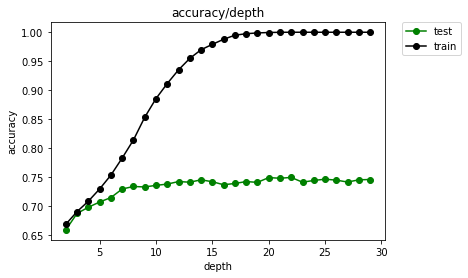

In [79]:
import matplotlib.pyplot as plt
x = accuracy_depth_test.keys()
y1 = accuracy_depth_test.values()
y2 = accuracy_depth_train.values()
plt.title("accuracy/depth")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [80]:
accuracy_depth_test

{2: 0.6582625376815566,
 3: 0.6867634968484516,
 4: 0.6974513565360373,
 5: 0.7064949301178405,
 6: 0.7141682652781584,
 7: 0.7289668402302001,
 8: 0.7333516031789531,
 9: 0.7325294601260619,
 10: 0.7352699369690326,
 11: 0.7374623184434091,
 12: 0.7418470813921623,
 13: 0.740750890654974,
 14: 0.74486160591943,
 15: 0.7415730337078652,
 16: 0.7363661277062209,
 17: 0.7385585091805974,
 18: 0.7418470813921623,
 19: 0.740476842970677,
 20: 0.748698273499589,
 21: 0.7476020827624007,
 22: 0.748972321183886,
 23: 0.740750890654974,
 24: 0.7437654151822417,
 25: 0.7459577966566182,
 26: 0.7443135105508358,
 27: 0.7410249383392711,
 28: 0.74486160591943,
 29: 0.7454097012880241}

### 2-4-4-Application on additional data sets

In [81]:
# not paid and loss more than 90
rf = RandomForestClassifier(max_depth=12, random_state=42)
rf.fit(X_train_sc, y_train)
con_matr, acc_scor = model_check(y_more_90, rf.predict(X_more_90_sc), rf)
accuracy_model = accuracy_model.append({'model':'Random Forest','scaled':True,'dataset':'more_90','type': 'test','accuracy':acc_scor},ignore_index=True)

In [82]:
# not paid and loss less than 10
con_matr, acc_scor = model_check(y_less_10, rf.predict(X_less_10_sc), rf)
accuracy_model = accuracy_model.append({'model':'Random Forest','scaled':True,'dataset':'less_10','type': 'test','accuracy':acc_scor},ignore_index=True)

## 2-5-Support Vector Machine

### 2-5-1-Modell

In [83]:
from sklearn.svm import SVC

In [84]:
svm = SVC(probability=True)

In [85]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [86]:
# train
conf_matr, acc_scor = model_check(y_train, svm.predict(X_train), svm)
accuracy_model = accuracy_model.append({'model':'Support Vector Machine','scaled':False,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [87]:
# test
conf_matr, acc_scor = model_check(y_test, svm.predict(X_test), svm)
accuracy_model = accuracy_model.append({'model':'Support Vector Machine','scaled':False,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-5-2-Modell with normalization+

In [88]:
# train
svm.fit(X_train_sc, y_train)
conf_matr, acc_scor = model_check(y_train, svm.predict(X_train_sc), svm)
accuracy_model = accuracy_model.append({'model':'Support Vector Machine','scaled':True,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [89]:
# test
conf_matr, acc_scor = model_check(y_test, svm.predict(X_test_sc), svm)
accuracy_model = accuracy_model.append({'model':'Support Vector Machine','scaled':True,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-5-3-Application on additional data sets

In [90]:
# not paid and loss more than 90
svm = SVC(probability=True)
svm.fit(X_train_sc, y_train)
conf_matr, acc_scor = model_check(y_more_90, svm.predict(X_more_90_sc), svm)
accuracy_model = accuracy_model.append({'model':'Support Vector Machine','scaled':True,'dataset':'more_90','type': 'test','accuracy':acc_scor},ignore_index=True)

In [91]:
# not paid and loss less than 10
conf_matr, acc_scor = model_check(y_less_10, svm.predict(X_less_10_sc), svm)
accuracy_model = accuracy_model.append({'model':'Support Vector Machine','scaled':True,'dataset':'less_10','type': 'test','accuracy':acc_scor},ignore_index=True)

## 2-6-PCA/Principal Component Analysis

### 2-6-1-Modell+

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [93]:
pca.explained_variance_ratio_

array([9.99989262e-01, 1.07228968e-05, 1.08387666e-08, 4.04597799e-09])

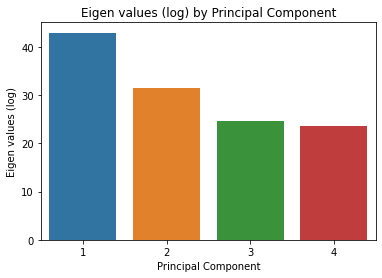

In [94]:
import numpy as np
import seaborn as sns
sns.barplot(
    x=[str(comp) for comp in range(1, len(pca.explained_variance_ratio_) + 1)], 
    y=np.log(pca.explained_variance_)
)
plt.title('Eigen values (log) by Principal Component')
plt.ylabel('Eigen values (log)')
plt.xlabel('Principal Component')
plt.show()

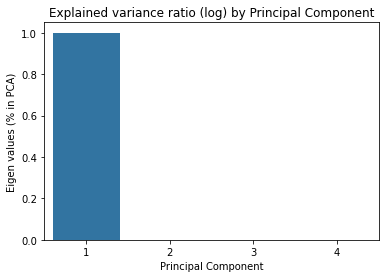

In [95]:
sns.barplot(
    x=[str(comp) for comp in range(1, len(pca.explained_variance_ratio_) + 1)], 
    y=pca.explained_variance_ratio_
)
plt.title('Explained variance ratio (log) by Principal Component')
plt.ylabel('Eigen values (% in PCA)')
plt.xlabel('Principal Component')
plt.show()

In [96]:
tree_pca = DecisionTreeClassifier(max_depth=5)

In [97]:
tree_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=5)

In [98]:
# train
conf_matr, acc_scor = model_check(y_train, tree_pca.predict(X_train_pca),tree_pca)
accuracy_model = accuracy_model.append({'model':'PCA + Decision Tree','scaled':False,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [99]:
# test
conf_matr, acc_scor = model_check(y_test, tree_pca.predict(X_test_pca),tree_pca)
accuracy_model = accuracy_model.append({'model':'PCA + Decision Tree','scaled':False,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-6-2-Model with normalization

In [100]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [101]:
tree_pca = DecisionTreeClassifier(max_depth=5)

In [102]:
tree_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=5)

In [103]:
# train
conf_matr, acc_scor = model_check(y_train, tree_pca.predict(X_train_pca),tree_pca)
accuracy_model = accuracy_model.append({'model':'PCA + Decision Tree','scaled':True,'dataset':'balanced','type': 'train','accuracy':acc_scor},ignore_index=True)

In [104]:
len(y_test), len(X_test_sc), len(X_test_pca),

(3649, 3649, 3649)

In [105]:
# test
conf_matr, acc_scor = model_check(y_test, tree_pca.predict(X_test_pca),tree_pca)
accuracy_model = accuracy_model.append({'model':'PCA + Decision Tree','scaled':True,'dataset':'balanced','type': 'test','accuracy':acc_scor},ignore_index=True)

### 2-6-x-Accuracy / number of components

In [106]:
from sklearn.decomposition import PCA
accuracy_npc_test = {}
accuracy_npc_train = {}
for i in range(2,10):
    # apply pca
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_sc)
    X_test_pca = pca.transform(X_test_sc)
    # decision tree
    tree_pca = DecisionTreeClassifier(max_depth=5)
    tree_pca.fit(X_train_pca, y_train)
    # get predictions
    conf_matr_train, acc_npc_tr = model_check(y_train, tree_pca.predict(X_train_pca),tree_pca)
    conf_matr_test, acc_npc_test = model_check(y_test, tree_pca.predict(X_test_pca),tree_pca)
    # collect accuracy
    accuracy_npc_test[i] = acc_npc_test
    accuracy_npc_train[i] = acc_npc_tr


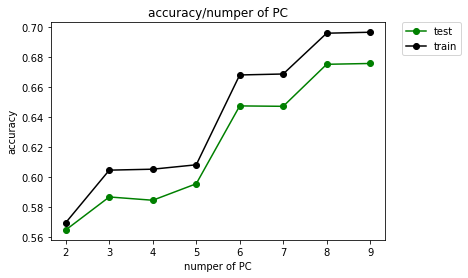

In [107]:
import matplotlib.pyplot as plt
x = accuracy_npc_test.keys()
y1 = accuracy_npc_test.values()
y2 = accuracy_npc_train.values()
plt.title("accuracy/numper of PC")
plt.xlabel("numper of PC")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [108]:
accuracy_npc_test

{2: 0.5648122773362565,
 3: 0.586736092080022,
 4: 0.5845437106056454,
 5: 0.5955056179775281,
 6: 0.6473006303096739,
 7: 0.6470265826253768,
 8: 0.6749794464236777,
 9: 0.6755275417922718}

### 2-6-3-Application on additional data sets

In [109]:
# not paid and loss more than 90
pca = PCA(n_components=4)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_more_90_sc)

tree_pca = DecisionTreeClassifier(max_depth=3)
tree_pca.fit(X_train_pca, y_train)

conf_matr, acc_scor = model_check(y_more_90, tree_pca.predict(X_test_pca), tree_pca)
accuracy_model = accuracy_model.append({'model':'PCA + Decision Tree','scaled':True,'dataset':'more_90','type': 'test','accuracy':acc_scor},ignore_index=True)

In [110]:
# not paid and loss less than 10
X_test_pca = pca.transform(X_less_10_sc)
conf_matr, acc_scor =model_check(y_less_10, tree_pca.predict(X_test_pca), tree_pca)
accuracy_model = accuracy_model.append({'model':'PCA + Decision Tree','scaled':True,'dataset':'less_10','type': 'test','accuracy':acc_scor},ignore_index=True)

# 3-Comparing models

## 3-1-Standard dataset 

### 3-1-1- accuracy scaled/not scaled data

In [111]:
accuracy_model

,model,scaled,dataset,type,accuracy
0,Decision Tree,False,balanced,train,0.709365
1,Decision Tree,False,balanced,test,0.696355
2,Decision Tree,True,balanced,train,0.709365
3,Decision Tree,True,balanced,test,0.696355
4,Decision Tree,True,more_90,test,0.600000
5,Decision Tree,True,less_10,test,0.468233
6,KNN,False,balanced,train,0.675651
7,KNN,False,balanced,test,0.545081
8,KNN,True,balanced,train,0.760256
9,KNN,True,balanced,test,0.658263


In [112]:
data_filtered = accuracy_model.copy()
data_filtered.query('type == "test" & dataset == "balanced"', inplace=True)
data_filtered.sort_values(by='accuracy',ascending=False,inplace=True)
data_filtered

,model,scaled,dataset,type,accuracy
21,Random Forest,True,balanced,test,0.737462
19,Random Forest,False,balanced,test,0.737188
15,Logistic regression,True,balanced,test,0.717183
27,Support Vector Machine,True,balanced,test,0.701562
1,Decision Tree,False,balanced,test,0.696355
3,Decision Tree,True,balanced,test,0.696355
9,KNN,True,balanced,test,0.658263
31,PCA + Decision Tree,False,balanced,test,0.593587
33,PCA + Decision Tree,True,balanced,test,0.584544
25,Support Vector Machine,False,balanced,test,0.571115


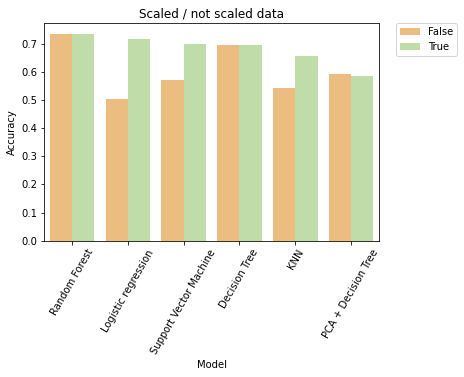

In [113]:
sns.barplot(data = data_filtered, x = "model", y = "accuracy", 
            hue = "scaled", palette = "Spectral")
plt.title("Scaled / not scaled data")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation = 60)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [114]:
# data_filtered = accuracy_model.copy()
# data_filtered.query('type == "train"', inplace=True)
# data_filtered
# sns.barplot(data = data_filtered, x = "model", y = "accuracy", 
#             hue = "scaled", palette = "Spectral")
# plt.title("Scaled / not scaled data")
# plt.xlabel("Model")
# plt.ylabel("Accuracy")
# plt.xticks(rotation = 60)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.show()

### 3-1-2- ROC CURVE

## 3-2-Additional datasets - accuracy

### 3-2-1- accuracy 

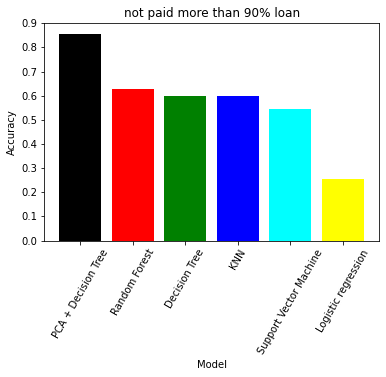

In [115]:
# more_90
data_filtered = accuracy_model.copy()
data_filtered.query('dataset == "more_90"', inplace=True)
data_filtered.sort_values(by='accuracy',ascending=False,inplace=True)
### plot
plt.bar(data_filtered["model"],data_filtered["accuracy"],color=['black', 'red', 'green', 'blue', 'cyan','yellow'])
plt.title("not paid more than 90% loan")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation = 60)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

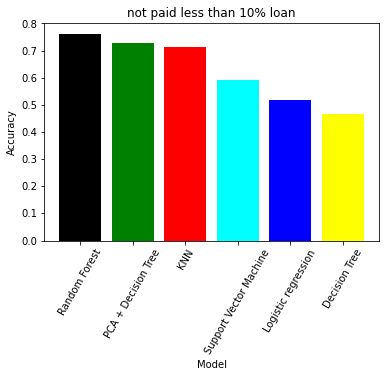

In [116]:
# less_10
data_filtered = accuracy_model.copy()
data_filtered.query('dataset == "less_10"', inplace=True)
data_filtered.sort_values(by='accuracy',ascending=False,inplace=True)
### plot
plt.bar(data_filtered["model"],data_filtered["accuracy"],color=['black', 'green', 'red', 'cyan', 'blue','yellow'])
plt.title("not paid less than 10% loan")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation = 60)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [117]:
data_filtered

,model,scaled,dataset,type,accuracy
23,Random Forest,True,less_10,test,0.762970
35,PCA + Decision Tree,True,less_10,test,0.729135
11,KNN,True,less_10,test,0.711842
29,Support Vector Machine,True,less_10,test,0.592481
17,Logistic regression,True,less_10,test,0.518985
5,Decision Tree,True,less_10,test,0.468233


### 3-2-2- ROC CURVE